# Data Curation and Analysis of the S&P 500
#### See project on data.world: https://data.world/ztoy/sp-500-companies-2023
#### The goal of this assignment is to show my ability to construct, analyze, and publish a dataset of the current S&P 500 companies on data.world. The purpose was to demonstrate that I can follow best practices for open scientific research in designing and implementing my project, and make my project fully reproducible by others: from data collection to data analysis.
#### The data from this project is taken from:  Wikipedia contributors. (2023, February 23). List of S&P 500 companies. Wikipedia. https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

## Data extraction

### Importing libraries

In [216]:
try:
    from bs4 import BeautifulSoup
    import pandas as pd
    import numpy as np
    print ("BeautifulSoup and Pandas are already installed and imported")
except:
    import sys
    !conda install --yes --prefix {sys.prefix} bs4
    !conda install --yes --prefix {sys.prefix} pandas
    from bs4 import BeautifulSoup
    import pandas
    print ("BeautifulSoup and Pandas were not found. Installed them and imported")

import requests

BeautifulSoup and Pandas are already installed and imported


### Read the webpage and parse it with BeautifulSoup

#### Read the webpage and parse it with BeautifulSoup

In [ ]:
opened_webpage = requests.get("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")
print ("Webpage opened successfully...")

#### Initialize a BeautifulSoup object to read and parse the webpage read

In [217]:
bs = BeautifulSoup(opened_webpage.content, "html.parser")
print ("Webpage loaded and parsed successfully...")

Webpage opened successfully...
Webpage loaded and parsed successfully...


### Convert to dataframe

#### Read the html and converting list to dataframe

In [218]:
df = pd.read_html(str(bs))

df = pd.DataFrame(df[0])
df.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


### Duplication checks

#### Check for duplicates

In [243]:
number_of_duplicates = df.duplicated().sum()
print (f" Number of duplicates before : {number_of_duplicates}")

 Number of duplicates before : 0


#### Delete duplicate rows (not necessary)

In [242]:
df = df.drop_duplicates()

number_of_duplicates = df.duplicated().sum()
print (f" Number of duplicates after removing : {number_of_duplicates}")

 Number of duplicates after removing : 0


### Inspecting data and checking noisy entries

#### Data types

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   GICS Sector            503 non-null    object
 3   GICS Sub-Industry      503 non-null    object
 4   Headquarters Location  503 non-null    object
 5   Date added             499 non-null    object
 6   CIK                    503 non-null    int64 
 7   Founded                503 non-null    object
dtypes: int64(1), object(7)
memory usage: 35.4+ KB


#### Describe function for numerical columns

In [244]:
df.describe()

,Date added,CIK,Founded
count,499.000000,4.990000e+02,499.000000
mean,1999.551102,7.949863e+05,1955.170341
std,20.122988,5.555856e+05,48.667393
min,1957.000000,1.800000e+03,1784.000000
25%,1988.000000,9.761050e+04,1919.500000
50%,2006.000000,8.857250e+05,1970.000000
75%,2016.000000,1.139327e+06,1994.000000
max,2023.000000,1.932393e+06,2022.000000


In [221]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 499 non-null    object
 1   Security               499 non-null    object
 2   GICS Sector            499 non-null    object
 3   GICS Sub-Industry      499 non-null    object
 4   Headquarters Location  499 non-null    object
 5   Date added             499 non-null    object
 6   CIK                    499 non-null    int64 
 7   Founded                499 non-null    object
dtypes: int64(1), object(7)
memory usage: 35.1+ KB


### Additional transformations

#### Define a function for cleaning strings and converting columns to integers

In [222]:
def clean_founded(s):
    s = s.split(" ") 
    s = s[0]
    
    s = s.split("/")
    s = s[0]
    
    converted = int(s)
    return converted

df["Founded"] = df["Founded"].apply(clean_founded)

def clean_date(s):
    s = s.replace("<", "")
    s = s.replace("?", "")
    s = s.split("-")
    s = s[0]
    
    converted = int(s)
    return converted

df["Date added"] = df["Date added"].apply(clean_date)

df

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012,1551152,2013
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001,109380,1873


### Description of data

#### Symbol: str; the ticker symbol for company
#### Security: str; the company
#### GISC Sector: str; the company industry
#### GISC Sub-Industry: str; the company sub-industry
#### Headquarters Location: str; the city and state location of the company's headquarters
#### Date Added: int; the year that the company was added to S&P 500
#### CIK: int; government-issued company identification number
#### Founded: int; the year that the company was founded

### Saving dataframe as .csv file

In [223]:
df.to_csv("S&P500.csv")

### Histogram: What industry do most of the S&P 500 companies fall into? What does this tell us?

[Text(0.5, 1.0, 'GICS Sector of Company vs Count in S&P 500')]

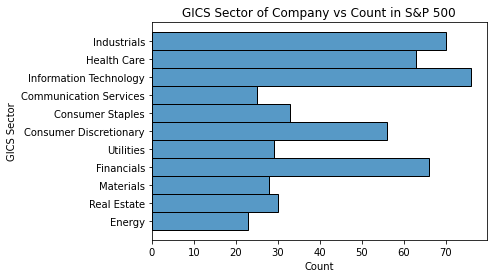

In [224]:
import seaborn as sns

hist = sns.histplot(df, y="GICS Sector", stat = 'count')
hist.set(title='GICS Sector of Company vs Count in S&P 500')

Out of the companies in the S&P 500, majority fall into Global Industry Classification Standard (GICS) category of Industrials, Health Care, Information Technology, and Financials.

I found it surprising that out of all the different industries, there are Information Technology companies than any other type. This result suggests that most of the United States' largest companies are within the IT industry, followed by Industrials and Financials. 

### Boxplot: How does the company's GICS Sector classification relate to the year it was added? 

[Text(0.5, 1.0, 'GICS Sector of Company vs Year Added to S&P 500'),
 Text(0.5, 0, 'Year Added'),
 Text(0, 0.5, 'GICS Sector')]

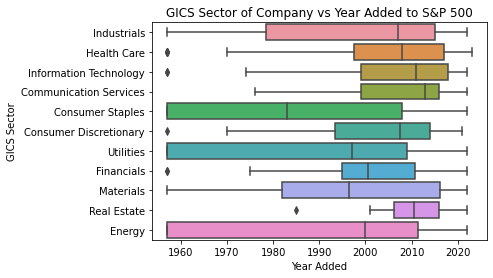

In [225]:
boxplot = sns.boxplot(y=df['GICS Sector'], x=df['Date added'])
boxplot.set(title='GICS Sector of Company vs Year Added to S&P 500', xlabel='Year Added',ylabel='GICS Sector')

The boxplot reveals that, on average, the S&P 500 companies that fall under the Communication Services category were most recently added to the list (mid 2010s), with Information Technology falling closely behind. In contrast, the companies that fall under the Consumer Staples category were added earliest (mid 1980s).

I was surprised that the category with the most recent additions to the S&P 500 was Communication Services; my assumption was that Information Technology would be most recent given that the sector is rapidly growing.

### Regression plot: Is there a relationship between the year a company was founded and the date it was added to the S&P 500?

[Text(0.5, 1.0, 'Company Year Founed vs Year Added to S&P 500'),
 Text(0.5, 0, 'Year Founded'),
 Text(0, 0.5, 'Year Added')]

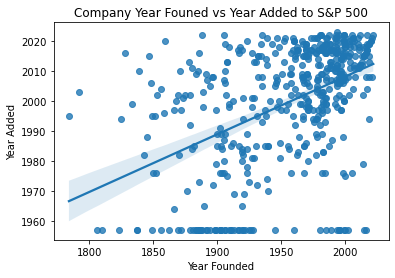

In [239]:
regplot = sns.regplot(data=df, x="Founded", y="Date added")
regplot.set(title='Company Year Founed vs Year Added to S&P 500', xlabel='Year Founded',ylabel='Year Added')

In [240]:
from scipy.stats import pearsonr

p = pearsonr(df["Founded"],df["Date added"])
print(p[0])

0.46552066935482


According to the regression plot and our bivariate analysis, there is moderate positive association between the year a company was founded and the date it was added to the S&P 500.

### Scatterplot: double-checking

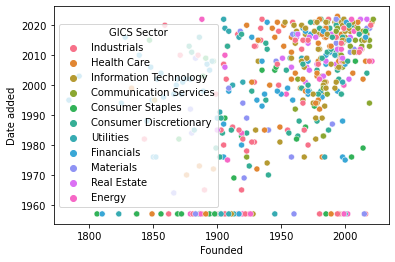

In [237]:
scatter = sns.scatterplot(data=df, x="Founded", y="Date added", hue="GICS Sector")

The above scatterplot was created to check if there was a relationship between the year a company was founded, the date it was added to the S&P 500, and the company's GISC Sector. The results show that there is no clear relationship between these variables.

License Copyright: Unknown.
License License: Unknown.
License Contact: Unknown.